
<p style ="text-align:center">
    <img src="http://epecora.com.br/DataFiles/PPGOLD_logo.png" width="300" alt="PPGOLD Data Science: INTRO"  />
</p>

# Aula 02 de Data Science

# Análise Descritiva
Tempo estimado: **60** minutos


## Objetivos



Após completar essa aula você será capaz de :
* Desenvolver uma tabela de frequências

* Calcular medidas de tendência central: 
    * Média
    * Moda
    * Mediana  
    * Medidas Separatrizes
    * Box Plot

* Calcular medidas de dispersão
    * Desvio padrão
    * Variância 
    * Coeficiente de variação

* Desenvolver Gráficos:
    * Variáveis Qualitativas
        * Barras
        * Pizza
    * Variáveis Quantitativas
        * Colunas
        * Scatter
        * Linha
        * Histograma
        * Densidade

* Analisar Correlações   

## Obtenção dos dados
* Vamos usar um arquivo que já sofreu um pré processamento dos dados.

In [2]:
import pandas as pd

In [3]:
caminho = "" # o objeto ainda está vazio. 

caminho = "https://raw.githubusercontent.com/EduPekUfpr/PPGOLD7037/dev/Data/MeuAutoLimpo.csv" 

df = pd.read_csv(caminho) 

In [4]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


## Tabela de Frequências

* Vamos escolher uma variável que contenha apena valores qualitativos
* Para essa aula usaremos a `Make`.
* Primeiro vou passar essa variável para um objeto chamado `df_make`

In [5]:
df_make= df['make'].to_frame()
df_make

,make
0,alfa-romero
1,alfa-romero
2,alfa-romero
3,audi
4,audi
...,...
196,volvo
197,volvo
198,volvo
199,volvo


* Agora vamos criar um novo dataframe com a frequência simples dos valores

In [6]:
df_make_freq = pd.DataFrame({'freq':df_make['make'].value_counts()})
df_make_freq


,freq
toyota,32
nissan,18
mazda,17
mitsubishi,13
honda,13
subaru,12
volkswagen,11
peugot,11
volvo,10
mercedes-benz,8


* Vamos adicionar ao novo dataframe a frequência acumulada

In [7]:
df_make_freq['freq ac'] = df_make_freq.cumsum()
df_make_freq

,freq,freq ac
toyota,32,32
nissan,18,50
mazda,17,67
mitsubishi,13,80
honda,13,93
subaru,12,105
volkswagen,11,116
peugot,11,127
volvo,10,137
mercedes-benz,8,145


* Agora adicionaremos uma nova frequência porém relativa

In [8]:
df_make_freq['freq rel'] = df_make_freq['freq'] / df_make_freq['freq'].sum()
df_make_freq

,freq,freq ac,freq rel
toyota,32,32,0.159204
nissan,18,50,0.089552
mazda,17,67,0.084577
mitsubishi,13,80,0.064677
honda,13,93,0.064677
subaru,12,105,0.059701
volkswagen,11,116,0.054726
peugot,11,127,0.054726
volvo,10,137,0.049751
mercedes-benz,8,145,0.039801


* Por fim para terminar a criação da nossa tabela de frequências vamos adicionar a frequência relativa acumulada

In [9]:
df_make_freq['freq rel ac'] = df_make_freq['freq rel'].cumsum()
df_make_freq

,freq,freq ac,freq rel,freq rel ac
toyota,32,32,0.159204,0.159204
nissan,18,50,0.089552,0.248756
mazda,17,67,0.084577,0.333333
mitsubishi,13,80,0.064677,0.398010
honda,13,93,0.064677,0.462687
subaru,12,105,0.059701,0.522388
volkswagen,11,116,0.054726,0.577114
peugot,11,127,0.054726,0.631841
volvo,10,137,0.049751,0.681592
mercedes-benz,8,145,0.039801,0.721393


## Medidas de Tendência Central

* Para o cálculo das medidas de tendência central vamos escolher uma variável quantitativa.
* Vamos escolher a variável `price`.

* Calculando a média

In [10]:
media = df['price'].mean()
print('- Média da variável price: {:.2f}'.format(media))

- Média da variável price: 13207.13


* Encontrando as modas

In [11]:
moda = df['price'].mode()
moda

0      5572.0
1      6229.0
2      6692.0
3      7295.0
4      7609.0
5      7775.0
6      7898.0
7      7957.0
8      8495.0
9      8845.0
10     8921.0
11     9279.0
12    13499.0
13    16500.0
14    18150.0
dtype: float64

* Encontrando a mediana

In [12]:
mediana = df['price'].median()
print('- Mediana da variável price: {:.2f}'.format(mediana))

- Mediana da variável price: 10295.00


* Encontrando os quartis

In [13]:
Q1 = df['price'].quantile(0.25)
print('- Primeiro Quartil da variável price: {:.2f}'.format(Q1))

Q2 = df['price'].quantile(0.5)
print('- Segundo Quartil da variável price: {:.2f}'.format(Q2))

Q3 = df['price'].quantile(0.75)
print('- Terceiro Quartil da variável price: {:.2f}'.format(Q3))

- Primeiro Quartil da variável price: 7775.00
- Segundo Quartil da variável price: 10295.00
- Terceiro Quartil da variável price: 16500.00


* Gráfico de box plot 

<AxesSubplot: >

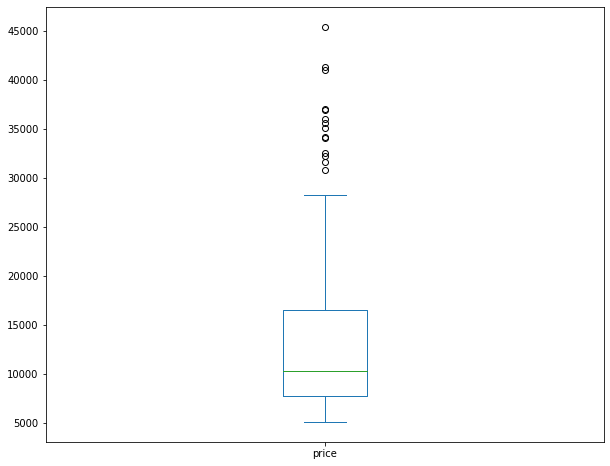

In [14]:
df['price'].plot(kind='box',figsize=(10,8))

## Medidas de Dispersão

* Continuaremos usando a variável `price`  para calcular as medidas de dispersão.

**Desvio Padrão Amostral**
* Iniciamos calulando o desvio padrão com o método `.std()` 
* Como parâmetro usamos `ddof=1` pois queremos calcular o desvio padrão amostral.

In [15]:
s=df['price'].std(ddof=1)
s

7947.066341939274

**Variância**

* Calculando a variância amostral com o método `.var()`

In [16]:
df['price'].var(ddof=1)

63155863.44318408

**Coeficiente de Variação**

* A formula é dada por:
$$CV = \frac{s}{\bar{X}} * 100 $$

In [17]:
CV = s/media * 100
CV

60.172548699944365

## Gráficos

### Variáveis Qualitativas
**Gráfico de barras**
* Vamos avaliar a frequência da coluna `make` já calculada anteriormente

In [18]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [19]:
print(plt.style.available)
mpl.style.use(['seaborn-v0_8-white']) # optional: for ggplot-like style

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


<AxesSubplot: title={'center': 'Frequência por fabricante'}, xlabel='Fabricante', ylabel='Quantidade'>

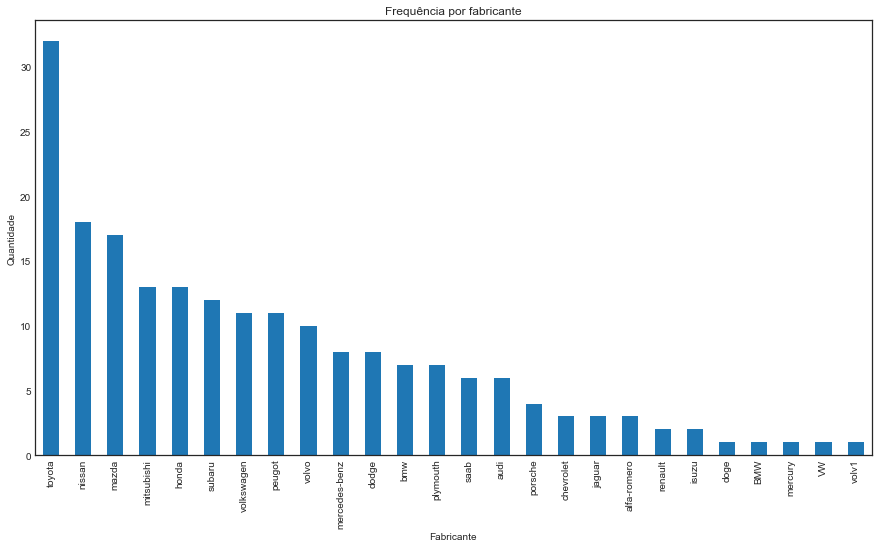

In [20]:
df_make_freq['freq'].plot(
                            kind='bar'
                            ,figsize=(15,8)
                            ,title='Frequência por fabricante'
                            ,xlabel='Fabricante'
                            ,ylabel='Quantidade'
                        )

**Gráfico de Pizza**
* Vamos analisar o top 5 fabricantes em um gráfico de pizza
* Para isso usaremos o método `.head(5)`  
* Criando um dataframe chamado `df_make_top` 

In [21]:
df_make_top = df_make_freq.head(5)
df_make_top

,freq,freq ac,freq rel,freq rel ac
toyota,32,32,0.159204,0.159204
nissan,18,50,0.089552,0.248756
mazda,17,67,0.084577,0.333333
mitsubishi,13,80,0.064677,0.398010
honda,13,93,0.064677,0.462687


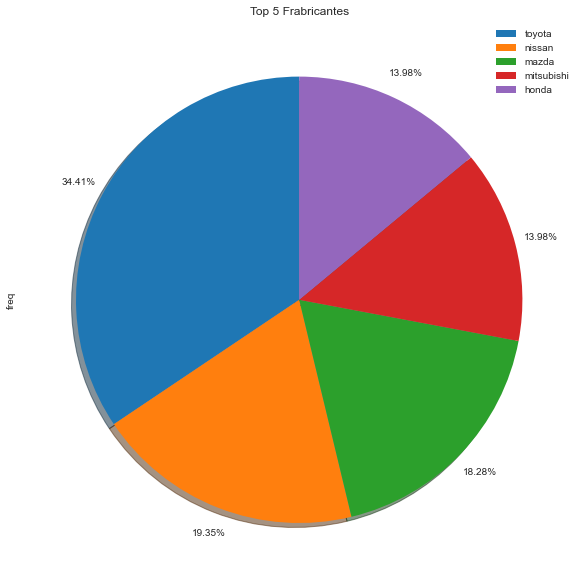

In [22]:
df_make_top['freq'].plot(
                            kind='pie'
                            ,title= 'Top 5 Frabricantes'
                            ,figsize=(10,16)
                            ,autopct='%1.2f%%'
                            ,pctdistance=1.12 
                            ,startangle=90
                            ,shadow=True       
                            ,labels=None
                        )
plt.legend(labels = df_make_top.index, loc='best')
plt.show()

### Variáveis Quantitativas
**Gráfico de Colunas**

* Vamos avaliar a frequência da coluna `make` já calculada anteriormente

<AxesSubplot: title={'center': 'Frequência de milhas por galão'}, xlabel='MPG', ylabel='Frequência'>

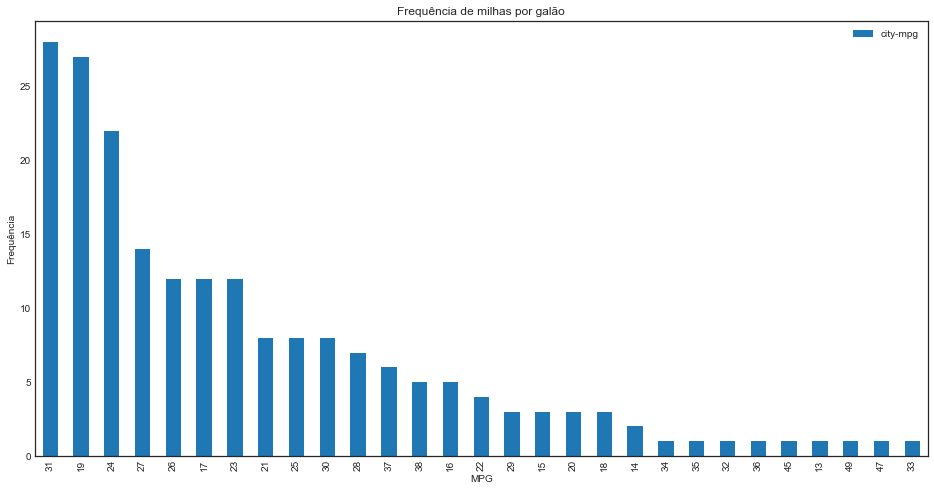

In [23]:
df_city_groped = df['city-mpg'].value_counts().to_frame()
df_city_groped.plot(kind='bar',figsize=(16,8),title="Frequência de milhas por galão",ylabel='Frequência',xlabel='MPG')

**Gráfico de Dispersão**
* Análise de uma variável apenas

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: title={'center': 'Distribuição do consumo na cidade'}, xlabel='index', ylabel='city-mpg'>

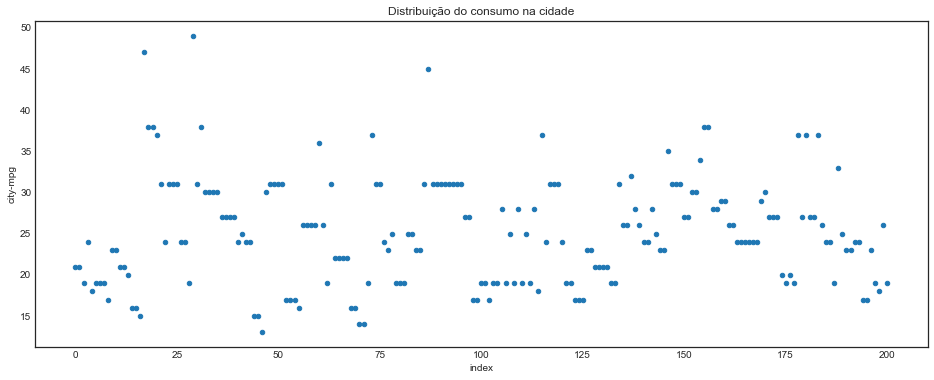

In [24]:
df_dispersao_uni = df['city-mpg'].to_frame().reset_index()
df_dispersao_uni.plot(kind='scatter',x='index',y='city-mpg',title="Distribuição do consumo na cidade",figsize=(16,6))


* Análise variável independente pela dependente

<AxesSubplot: title={'center': 'Consumo x Preço'}, xlabel='city-mpg', ylabel='price'>

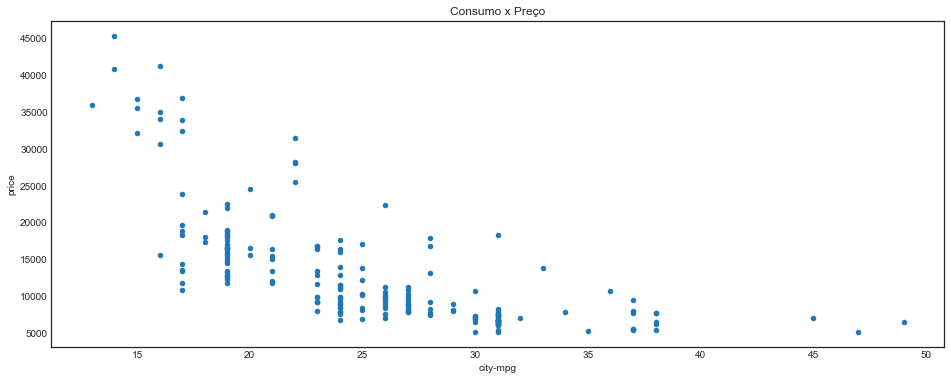

In [25]:
df_dispersao = df[['city-mpg','price']]
df_dispersao.plot(kind='scatter',x='city-mpg',y='price',title="Consumo x Preço",figsize=(16,6))

**Gráfico de histograma**

<AxesSubplot: title={'center': 'Histograma da Potência'}, ylabel='Frequency'>

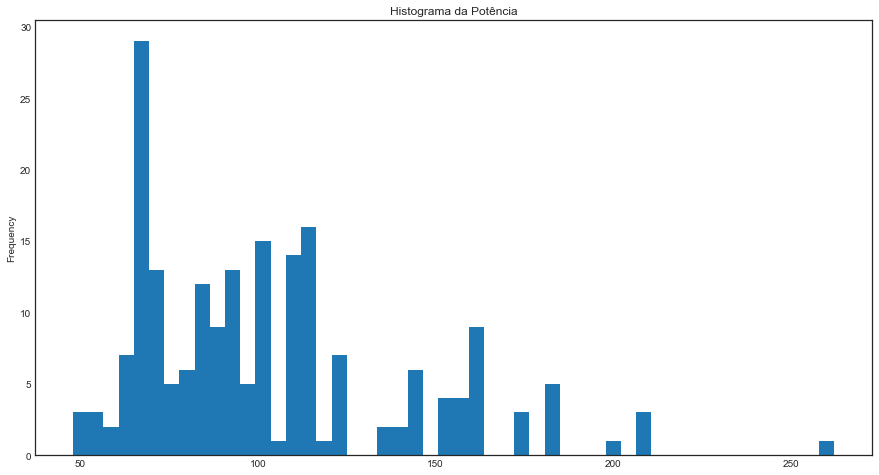

In [26]:
df['horsepower'].plot(kind='hist',figsize=(15,8),title='Histograma da Potência',bins=50)


**Gráfico de densidade**

<AxesSubplot: title={'center': 'Densidade'}, ylabel='Density'>

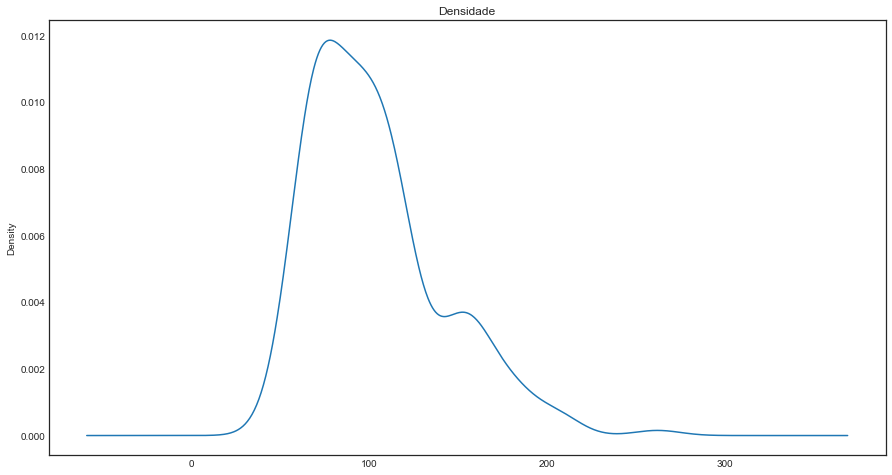

In [27]:
#implementar
df['horsepower'].plot(kind='density',figsize=(15,8),title='Densidade')

## Correlação

* Será usado o  seaborn 

In [28]:
import seaborn as sns

<AxesSubplot: >

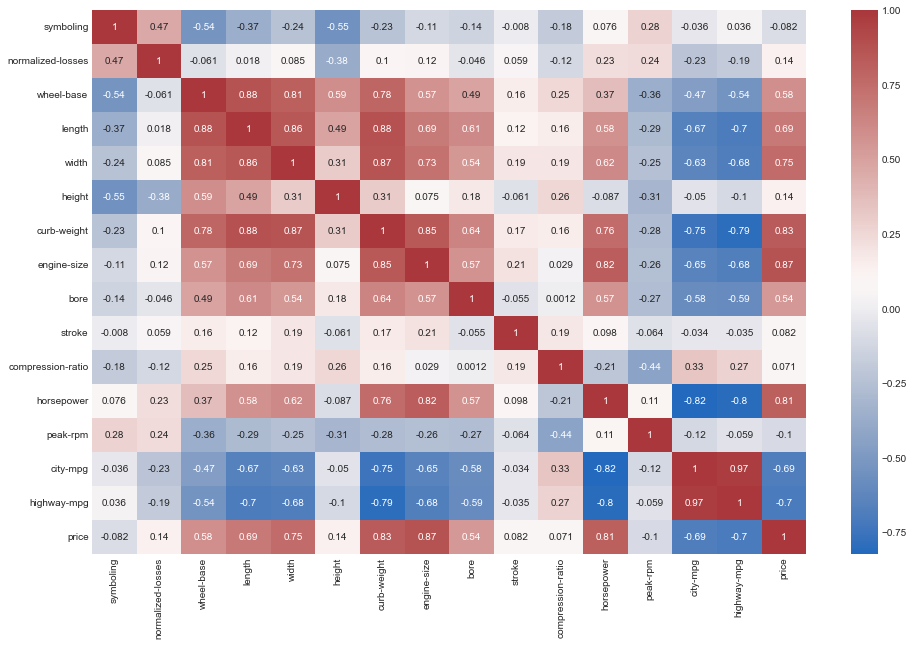

In [29]:
fig = plt.figure(figsize=(16,10))
ax1 = fig.subplots()
sns.heatmap(df.corr(),ax = ax1,annot=True,cmap = sns.color_palette("vlag", as_cmap=True))

## Describe

* O método `.describe()` faz um resumo estatístico de todas as variáveis.

In [32]:
df.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.000000,201,201,201,201,201,201,201,201.000000,...,201.000000,201,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
unique,NaN,NaN,26,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,181,165,115,94,118,198,NaN,...,NaN,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.840796,122.208955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.797015,...,126.875622,NaN,3.330711,3.256904,10.164279,103.396985,5117.587940,25.179104,30.686567,13207.129353
std,1.254802,32.133100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.066366,...,41.546834,NaN,0.268072,0.316048,4.004965,37.365602,478.113178,6.423220,6.815150,7947.066342
min,-2.000000,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,98.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5117.587940,24.000000,30.000000,10295.000000
75%,2.000000,142.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000


## Referências